# FAO : Etude de santé publique
**Import**
 - <a href="#C2"> Import des librairies et des données </a> 
 
**Requêtes  de Marc**

 - <a href='#C3'> Proportion de personnes en état de sous-nutrition </a>
 - <a href='#C4'> Nombre théorique de personnes qui pourraient être nourries </a>
 - <a href='#C5'> Nombre théorique de personnes qui pourraient être nourries avec produits d'origine vegetale </a>
 - <a href='#C6'> Utilisation de la disponibilité intérieure </a>

**Requêtes de Mélanie**

- <a href='#C7'> Pays pour lesquels la nombre de personnes sous-alimentées est la plus forte en 2017 </a>
- <a href='#C8'> Pays qui ont le plus bénéficié d’aide depuis 2013 </a>
- <a href='#C9'> Pays ayant le plus/le moins de disponibilité/habitant </a>

**Requêtes de Julien**
- <a href='#C10'> Utilisation des céréales </a>
- <a href='#C11'> Utilisation de manioc par la Thaïlande </a>


##  <a name="C2"> Import des librairies et des données  </a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
prc = 'C:/Users/Zacca/Projet4/'

In [3]:
# importation tableau csv
aide_alimentaire = pd.read_csv(prc + 'aide_alimentaire.csv')
dispo_alimentaire = pd.read_csv(prc + 'dispo_alimentaire.csv')
population = pd.read_csv(prc + 'population.csv')
sous_nutrition = pd.read_csv(prc+ 'sous_nutrition.csv')

In [4]:
# transformation nom colonnes
aide_alimentaire = aide_alimentaire.rename(columns={'Pays bénéficiaire' : 'Pays'})
dispo_alimentaire = dispo_alimentaire.rename(columns={'Zone' : 'Pays'})
population = population.rename(columns={'Zone' : 'Pays'})
sous_nutrition = sous_nutrition.rename(columns={'Zone' : 'Pays'})

## <a name="C3"> Proportion de personnes en état de sous-nutrition </a>

In [5]:
# Remplacer les dates dans la table sous_nutrition
sous_nutrition['Année'] = sous_nutrition['Année'].replace({'2012-2014' : '2013','2013-2015' : '2014','2014-2016' : '2015','2015-2017' : '2016','2016-2018' : '2017','2017-2019' : '2018'})

In [6]:
# remplacer valeur NaN avec des 0 et les valeurs <0.1 en 0 et transformation de la colonne valeur en numerique
sous_nutrition.replace('<0.1', 0, inplace=True)

In [7]:
sous_nutrition.fillna('0', inplace=True)

In [8]:
sous_nutrition['Valeur']=pd.to_numeric(sous_nutrition['Valeur'])

In [9]:
# Filtrer valeur du 2017
sous_nutrition_2017 = sous_nutrition[sous_nutrition['Année'] == '2017']

In [14]:
# Calcul numero total population en sous nutrition
sous_nutrition_total = sous_nutrition_2017['Valeur'].sum()*1000000
sous_nutrition_total

535700000.00000006

In [11]:
# Filtrer table population resultats pour année 2017
population_2017 = population[population['Année'] == 2017]

In [15]:
# Calcul population total en 2017
population_total_2017 = population_2017['Valeur'].sum()*1000
population_total_2017

7548134111.000001

In [13]:
# proportion entre population total et popoltion en sous nutrition
proportion_pourcentage = round((sous_nutrition_total/population_total_2017)*100,2)

In [86]:
# reponse question 1
print('La pourcentage des personnes sous-nourries par rapport a la popolation mondiale est de:', proportion_pourcentage, '% en 2017')

La pourcentage des personnes sous-nourries par rapport a la popolation mondiale est de: 7.1 % en 2017


## <a name="C4"> Nombre théorique de personnes qui pourraient être nourries </a>

In [87]:
# remplacer valeurs NaN
dispo_alimentaire.fillna('0', inplace = True)

In [88]:
# modifier valeurs dans colonne Disponibilité alimentaire (Kcal/personne/jour) en valeurs numeriques
dispo_alimentaire['Disponibilité alimentaire (Kcal/personne/jour)'] = pd.to_numeric(dispo_alimentaire['Disponibilité alimentaire (Kcal/personne/jour)'])

In [89]:
# merge entre les tables dispo_alimentaire et population avec 'Zone' comme index
table_alimentaire_population = pd.merge(dispo_alimentaire, population_2017, on='Pays')

In [90]:
# calcul disponibilité alimentaire en kcal multiplié par la population
Somme_disponibilite = table_alimentaire_population['Disponibilité alimentaire (Kcal/personne/jour)']*table_alimentaire_population['Valeur']

In [91]:
# calcul nombre theorique peuvent etre nourris
nombre_personnes_nourris = (np.sum(Somme_disponibilite)/2400)*1000

In [92]:
print('Nombre théorique de personnes qui pourraient être nourries : ',round(nombre_personnes_nourris), 'de personnes')
# Calcul pourcentage
pourcentage_personnes_nourris =((nombre_personnes_nourris)/(population_total_2017)*100)
print('Pourcentage des personnes qui peuvent etre nourris', round(pourcentage_personnes_nourris,2), '%')

Nombre théorique de personnes qui pourraient être nourries :  8716243595 de personnes
Pourcentage des personnes qui peuvent etre nourris 115.48 %


## <a name="C5"> Nombre théorique de personnes qui pourraient être nourries avec produits d'origine vegetale </a>

In [93]:
# Filtrer le valeur d'origine vegetale dans la table_alimentaire_population
table_alimentaire_population_vegetale = table_alimentaire_population.loc[table_alimentaire_population['Origine'] == 'vegetale']

In [94]:
# calcul disponibilité alimentaire en kcal multiplié par la population
Somme_disponibilite_vegetale = table_alimentaire_population_vegetale['Disponibilité alimentaire (Kcal/personne/jour)']*table_alimentaire_population_vegetale['Valeur']

In [95]:
# calcul nombre theorique peuvent etre nourris avec des produits vegetales
nombre_personnes_nourris_vegetale = (np.sum(Somme_disponibilite_vegetale)/2400)*1000

In [96]:
print('Nombre théorique de personnes qui pourraient être nourries avec produit vegetales : ',round(nombre_personnes_nourris_vegetale), 'de personnes')
# Calcul pourcentage vegetale
pourcentage_personnes_nourris_vegetale =((nombre_personnes_nourris_vegetale)/(population_total_2017)*100)
print('Pourcentage des personnes qui peuvent etre nourris, par rapport a la population mondiale', round(pourcentage_personnes_nourris_vegetale,2), '%')

Nombre théorique de personnes qui pourraient être nourries avec produit vegetales :  7191985088 de personnes
Pourcentage des personnes qui peuvent etre nourris, par rapport a la population mondiale 95.28 %


## <a name="C6"> Utilisation de la disponibilité intérieure </a>

In [97]:
# Transformer valeurs mixe entre str et float en valeur numeriques
table_alimentaire_population['Disponibilité intérieure'] = pd.to_numeric(table_alimentaire_population['Disponibilité intérieure'])
table_alimentaire_population['Nourriture'] = pd.to_numeric(table_alimentaire_population['Nourriture'])
table_alimentaire_population['Pertes'] = pd.to_numeric(table_alimentaire_population['Pertes'])
table_alimentaire_population['Aliments pour animaux'] = pd.to_numeric(table_alimentaire_population['Aliments pour animaux'])
table_alimentaire_population['Autres Utilisations'] = pd.to_numeric(table_alimentaire_population['Autres Utilisations'])
table_alimentaire_population['Traitement'] = pd.to_numeric(table_alimentaire_population['Traitement'])
table_alimentaire_population['Semences'] = pd.to_numeric(table_alimentaire_population['Semences'])

In [98]:
# calcul total disponibilite interieur total
dispo_alimentaire_interieur_total = np.sum(table_alimentaire_population['Disponibilité intérieure'])

In [99]:
# calcul total nourriture, pertes, aliments pour animaux, autres utilisation
dispo_alimentaire_nourriture_total = np.sum(table_alimentaire_population['Nourriture'])
dispo_alimentaire_pertes_total = np.sum(table_alimentaire_population['Pertes'])
dispo_alimentaire_aliments_animaux_total = np.sum(table_alimentaire_population['Aliments pour animaux'])
dispo_alimentaire_autre_utilisation_total = np.sum(table_alimentaire_population['Autres Utilisations'])
dispo_alimentaire_traitement_total = np.sum(table_alimentaire_population['Traitement'])
dispo_alimentaire_semences_total = np.sum(table_alimentaire_population['Semences'])

In [100]:
# calcul pourcentage pour chaque categorie
pourc_nourriture = round((dispo_alimentaire_nourriture_total / dispo_alimentaire_interieur_total)*100,2)
pourc_pertes = round((dispo_alimentaire_pertes_total / dispo_alimentaire_interieur_total)*100,2)
pourc_aliments_animaux = round((dispo_alimentaire_aliments_animaux_total / dispo_alimentaire_interieur_total)*100,2)
pourc_autre_utilisation = round((dispo_alimentaire_autre_utilisation_total / dispo_alimentaire_interieur_total)*100,2)
pourc_traitement = round((dispo_alimentaire_traitement_total / dispo_alimentaire_interieur_total)*100,2)
pourc_semences = round((dispo_alimentaire_semences_total / dispo_alimentaire_interieur_total)*100,2)

In [101]:
# calcul pourcentages total
pourc_total = pourc_nourriture + pourc_pertes + pourc_aliments_animaux + pourc_autre_utilisation + pourc_traitement + pourc_semences
pourc_total

100.1

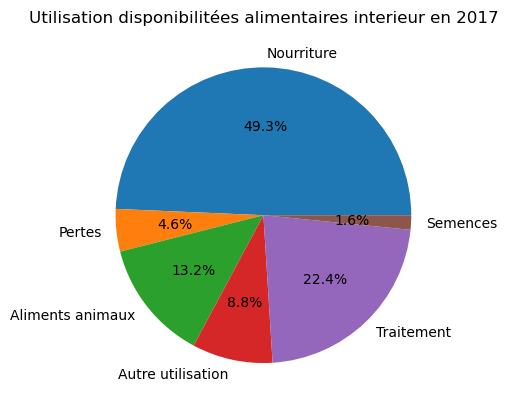

In [102]:
# creation variable
df_pie = [pourc_nourriture, pourc_pertes, pourc_aliments_animaux, pourc_autre_utilisation, pourc_traitement, pourc_semences]
label = ['Nourriture','Pertes','Aliments animaux', 'Autre utilisation','Traitement','Semences']
# creation graphique
plt.title('Utilisation disponibilitées alimentaires interieur en 2017')
plt.pie(df_pie, labels = label, autopct= '%1.1f%%' )
plt.show()

## <a name="C7">  Pays pour lesquels la proportion de personnes sous-alimentées est la plus forte en 2017 </a>

In [103]:
# creation deux pivot table pour table population et sous nutrition pour pouvoir les merger
population_grouped = population_2017.pivot_table(index='Pays',values='Valeur', aggfunc='sum')
sous_nutri_grouped = sous_nutrition_2017.pivot_table(index='Pays',values='Valeur', aggfunc='sum')

In [104]:
# merge entre la table population et sous nutrition
table_population_sous_nutri = pd.merge(population_grouped, sous_nutri_grouped, on='Pays')

In [105]:
# rapport entre population et population sous nutrition
table_population_sous_nutri['Rapport'] = ((table_population_sous_nutri['Valeur_y']*1000000)/(table_population_sous_nutri['Valeur_x']*1000))*100
table_population_sous_nutri_sorted = table_population_sous_nutri.sort_values(by = 'Rapport', ascending = False)
table_population_sous_nutri_sorted['Rapport'] = round(table_population_sous_nutri_sorted['Rapport'],2)
table_population_sous_nutri_sorted.pop('Valeur_x')
table_population_sous_nutri_sorted.pop('Valeur_y')
table_population_sous_nutri_sorted.head(10)

,Rapport
Pays,
Haïti,48.26
République populaire démocratique de Corée,47.19
Madagascar,41.06
Libéria,38.28
Lesotho,38.25
Tchad,37.96
Rwanda,35.06
Mozambique,32.81
Timor-Leste,32.17


## <a name="C8"> Pays qui ont le plus bénéficié d’aide depuis 2013 </a>

In [106]:
# transformation variable Annee en variable numerique
aide_alimentaire['Année']= pd.to_numeric(aide_alimentaire['Année'])

In [107]:
# filtrer les variables apres 2013
aide_alimentaire_2013 = aide_alimentaire.loc[aide_alimentaire['Année'] >= 2013]

In [108]:
# groupement par pays
aide_alimentaire_2013 = aide_alimentaire_2013.groupby('Pays').sum()

In [109]:
# sort by pour mettre en ordre decroissant les donnees
aide_alimentaire_2013 = aide_alimentaire_2013.sort_values(by = 'Valeur', ascending = False)

In [110]:
# creation variable pour preparer les donnees pour le graphique

aide_alimentaire_2013_sorted = aide_alimentaire_2013.head(5)
aide_alimentaire_2013.pop('Année')
aide_alimentaire_2013.head(5)


,Valeur
Pays,
République arabe syrienne,1858943
Éthiopie,1381294
Yémen,1206484
Soudan du Sud,695248
Soudan,669784


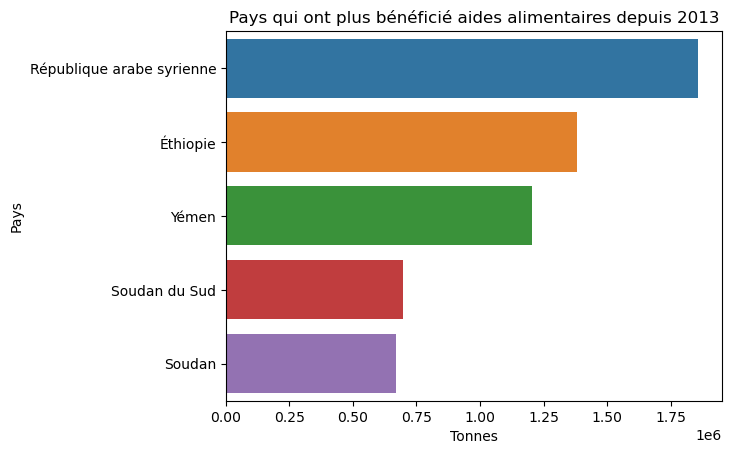

In [111]:
# creation title graphique
plt.title('Pays qui ont plus bénéficié aides alimentaires depuis 2013')
plt.xlabel('Tonnes d aides alimentaires')
# creation graphique
sns.barplot(data=aide_alimentaire_2013_sorted, x='Valeur',y=aide_alimentaire_2013_sorted.index, ci=None,estimator=np.sum)
plt.xlabel('Tonnes')
plt.show()

## <a name="C9"> Pays ayant le plus/le moins de disponibilité/habitant </a>

In [112]:
# pivoter table alimentaire et population
table_population_pivot = table_alimentaire_population.pivot_table(index='Pays', values='Disponibilité alimentaire (Kcal/personne/jour)', aggfunc='sum')

In [113]:
table_population_pivot_sorted = table_population_pivot.sort_values(by='Disponibilité alimentaire (Kcal/personne/jour)', ascending = False)
table_population_pivot_sorted.rename(columns={'Disponibilité alimentaire (Kcal/personne/jour)' : 'Disponibilité alimentaire/habitant'}, inplace = True)
table_population_pivot_sorted.head(5)


,Disponibilité alimentaire/habitant
Pays,
Autriche,3770.0
Belgique,3737.0
Turquie,3708.0
États-Unis d'Amérique,3682.0
Israël,3610.0


In [114]:
table_population_pivot_sorted = table_population_pivot.sort_values(by='Disponibilité alimentaire (Kcal/personne/jour)', ascending = True)
table_population_pivot_sorted.rename(columns={'Disponibilité alimentaire (Kcal/personne/jour)' : 'Disponibilité alimentaire/habitant'}, inplace = True)
table_population_pivot_sorted.head(5)

,Disponibilité alimentaire/habitant
Pays,
République centrafricaine,1879.0
Zambie,1924.0
Madagascar,2056.0
Afghanistan,2087.0
Haïti,2089.0


## <a name="C10"> Utilisation des céréales </a>
  

In [115]:
# transformation valuers colonnes en valeurs numeriques
dispo_alimentaire['Nourriture'] = pd.to_numeric(dispo_alimentaire['Nourriture'])
dispo_alimentaire['Aliments pour animaux'] = pd.to_numeric(dispo_alimentaire['Aliments pour animaux'])
dispo_alimentaire['Exportations - Quantité'] = pd.to_numeric(dispo_alimentaire['Exportations - Quantité'])
dispo_alimentaire['Production'] = pd.to_numeric(dispo_alimentaire['Production'])

In [116]:
# filtre pour trouver les cereales
dispo_alimentaire_cereales = dispo_alimentaire.loc[dispo_alimentaire['Produit'] == 'Céréales, Autres']

In [117]:
# calcul total entre nourriture et aliments pour animaux
total_cereales_nour_anim = np.sum(dispo_alimentaire_cereales['Nourriture']) + np.sum(dispo_alimentaire_cereales['Aliments pour animaux'])

In [118]:
# Calcul pourcentages
pourcentage_cereales = (np.sum(dispo_alimentaire_cereales['Nourriture']/total_cereales_nour_anim))*100
pourcentage_animaux = (np.sum(dispo_alimentaire_cereales['Aliments pour animaux']/total_cereales_nour_anim))*100

In [119]:
# print des resultats
print('Part destinés aux humaines', round(pourcentage_cereales,2),'%')
print('Part destinés aux animaux', round(pourcentage_animaux,2),'%')

Part destinés aux humaines 21.86 %
Part destinés aux animaux 78.14 %


In [120]:
# creation variable
df_pie = [pourcentage_cereales, pourcentage_animaux]
label = ['Part destinés aux humaines', 'Part destinés aux animaux']

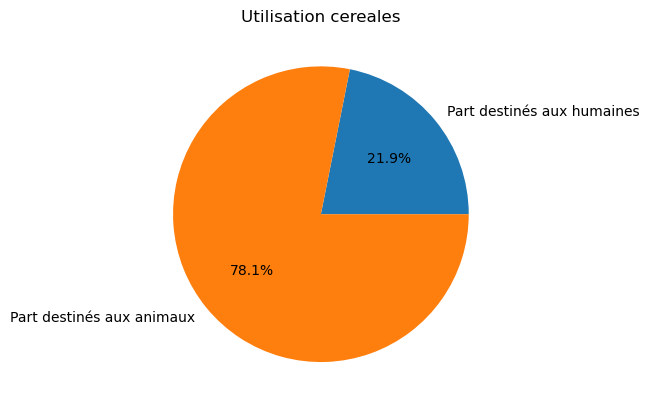

In [121]:
# creation graphique
plt.title('Utilisation cereales')
plt.pie(df_pie, labels = label, autopct= '%1.1f%%' )
plt.show()

## <a name="C11"> Utilisation de manioc par la Thaïlande </a>

In [122]:
# Filtre Thailandie et Manioc
dispo_alimentaire_thai = dispo_alimentaire[dispo_alimentaire['Pays'].str.contains('Thaïlande')]
dispo_alimentaire_thai_manioc = dispo_alimentaire_thai[dispo_alimentaire_thai['Produit'] == 'Manioc']

In [123]:
# merge etre table filtre et table sous_nutrition_2017
dispo_alimentaire_sous_nutr_manioc = pd.merge(dispo_alimentaire_thai_manioc, sous_nutrition_2017, on='Pays')

In [124]:
# Calcul pourcentage
pourc_export_manioc = round((dispo_alimentaire_sous_nutr_manioc['Exportations - Quantité']/dispo_alimentaire_sous_nutr_manioc['Production'])*100,2)

In [125]:
print('La pourcentage de manioc exporté :', pourc_export_manioc[0], '%')

La pourcentage de manioc exporté : 83.41 %


In [126]:
# merge avec la table population
dispo_alimentaire_sous_nutr_manioc = pd.merge(dispo_alimentaire_sous_nutr_manioc, population_2017, on='Pays' )

In [127]:
# calcul pourcentage rapport entre sous nutrition et population total
pourc_pop_sous_nutr = round((dispo_alimentaire_sous_nutr_manioc['Valeur_x']*1000000)/(dispo_alimentaire_sous_nutr_manioc['Valeur_y']*1000)*100,2)
print(' La pourcentage de la population en sous nutrition :',pourc_pop_sous_nutr[0],'%')

 La pourcentage de la population en sous nutrition : 8.96 %
